In [92]:
#Imports
import pandas as pd
import functions as func
import yaml
import matplotlib.pyplot as plt
import seaborn as sns

db_locations = func.import_yaml()

#load df
df_1 = pd.read_csv(db_locations['data_raw']['file1'])
df_2 = pd.read_csv(db_locations['data_raw']['file2'])
df_3 = pd.read_csv(db_locations['data_raw']['file3'])
df_4 = pd.read_csv(db_locations['data_raw']['file4'])


In [47]:
# Merge df_1 with df_2
df_user_comp = df_1.merge(df_2, on= "client_id").reindex(df_1.index)
df_user_comp.head(10)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
5,3727881,5.0,71.0,30.5,U,2.0,23915.60,0.0,3.0,Control
6,272934,5.0,66.0,58.5,U,2.0,27021.42,2.0,5.0,Control
7,388801,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0,Test
8,285619,30.0,369.0,67.5,M,2.0,299388.72,3.0,6.0,Control
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0,Test


In [61]:
df_user_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
 9   Variation         50500 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 5.4+ MB


In [48]:
#Checking null

df_user_comp.isnull().any()

client_id           False
clnt_tenure_yr       True
clnt_tenure_mnth     True
clnt_age             True
gendr                True
num_accts            True
bal                  True
calls_6_mnth         True
logons_6_mnth        True
Variation            True
dtype: bool

In [67]:
# droping rows with nan on the variation Column, clients that didnt use the app for the amount of time tested
# check the missing values, low quantity we can use the database as it is

df_user_comp.dropna(subset= "Variation",inplace=True)
df_user_comp.isnull().sum().sort_values(ascending=False)

clnt_age            13
clnt_tenure_yr      12
clnt_tenure_mnth    12
gendr               12
num_accts           12
bal                 12
calls_6_mnth        12
logons_6_mnth       12
client_id            0
Variation            0
dtype: int64

In [68]:
#checking types of data 
df_user_comp.select_dtypes("number").nunique().sort_values(ascending=False)


client_id           50500
bal                 50312
clnt_tenure_mnth      469
clnt_age              158
clnt_tenure_yr         53
num_accts               7
calls_6_mnth            7
logons_6_mnth           7
dtype: int64

In [69]:
df_user_comp.select_dtypes("object").nunique().sort_values(ascending=False)

gendr        4
Variation    2
dtype: int64

In [79]:
#checking frequency table for gender
# By the result could assume that the database probably is probably 50/50 on gender, with a small higher number of males
# The data is inconclusive, so we cant use it
frequency_table = df_user_comp['gendr'].value_counts()
proportion_table = df_user_comp['gendr'].value_counts(normalize=True)

frequency_table

gendr
U    17280
M    16947
F    16259
X        2
Name: count, dtype: int64

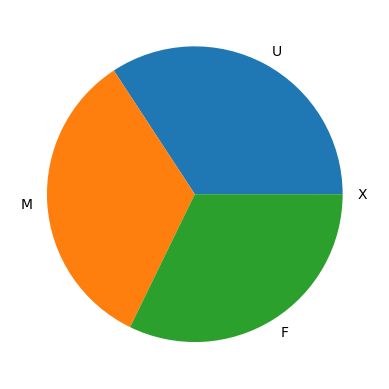

In [88]:
plt.pie(proportion_table.values, labels = proportion_table.index)
plt.show()

In [90]:
#checking numerical values

df_user_comp.select_dtypes("number").describe()


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,5.050000e+04,50488.000000,50488.000000,50487.000000,50488.000000,5.048800e+04,50488.000000,50488.000000
mean,5.006179e+06,12.031730,150.415485,47.319795,2.254575,1.495147e+05,3.093289,6.131873
std,2.877443e+06,6.860282,81.944830,15.518616,0.533671,3.020364e+05,2.187991,2.175423
min,5.550000e+02,2.000000,33.000000,17.000000,1.000000,2.378944e+04,0.000000,3.000000
25%,2.515646e+06,6.000000,82.000000,33.500000,2.000000,3.987841e+04,1.000000,4.000000
50%,5.025104e+06,11.000000,136.000000,48.000000,2.000000,6.573360e+04,3.000000,6.000000
75%,7.477933e+06,16.000000,192.000000,59.500000,2.000000,1.399565e+05,5.000000,8.000000
max,9.999832e+06,55.000000,669.000000,96.000000,7.000000,1.632004e+07,6.000000,9.000000


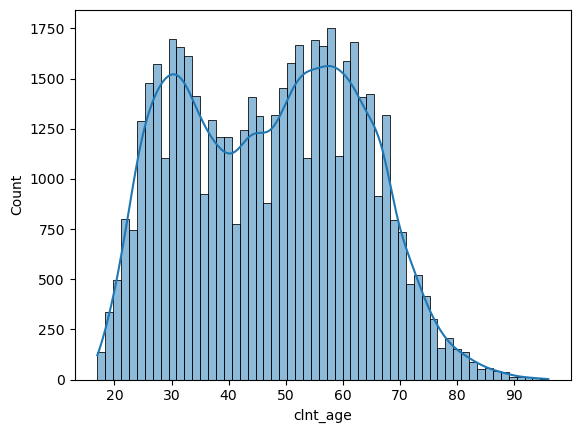

In [100]:
#Checking ages
sns.histplot(df_user_comp['clnt_age'], kde=True);


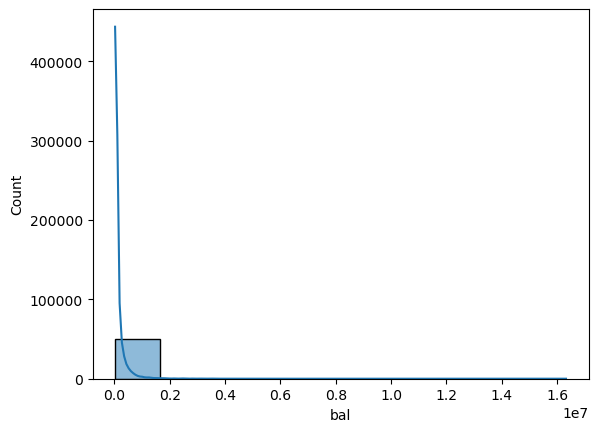

In [102]:
#Checking balance
sns.histplot(df_user_comp['bal'],bins= 10, kde=True);

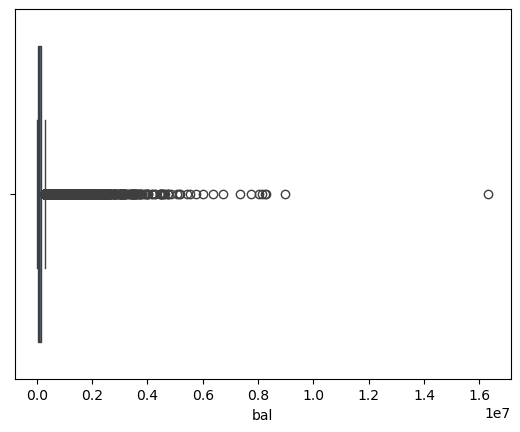

In [106]:
sns.boxplot(x = df_user_comp['bal']);

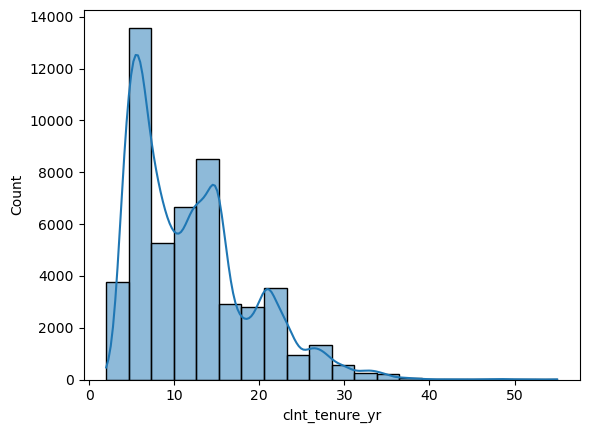

In [104]:
#Checking the time the client is a client 
sns.histplot(df_user_comp['clnt_tenure_yr'],bins= 20, kde=True);


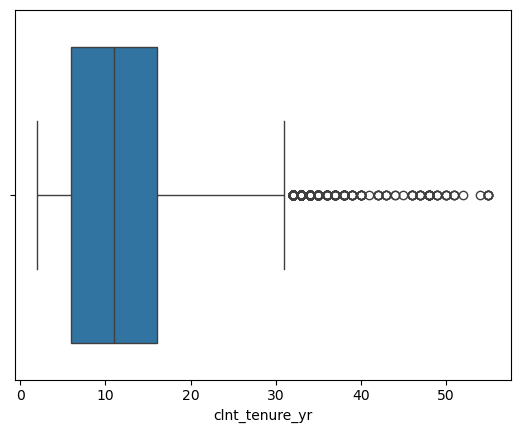

In [107]:
sns.boxplot(x = df_user_comp['clnt_tenure_yr']);

In [10]:
# Merge df_3 with df_4

df_combined = pd.concat([df_3, df_4], ignore_index=True)
df_combined.head(20)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
5,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:17:15
6,9988021,580560515_7732621733,781255054_21935453173_531117,step_1,2017-04-17 15:17:01
7,9988021,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17 15:16:22
8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05
9,8320017,39393514_33118319366,960651974_70596002104_312201,step_3,2017-04-05 13:09:43


In [ ]:
# play with:
# df_user_comp , drop users without variation (variation = NAN) 
#     graphs for all the colums of df_usercomp.


# graph with steps - count steps 
# graph wth the % steps = confirm
# graph with completion time
# graph for only start






